## Gathering data

In [1]:
import pandas as pd
import numpy as np
import requests as r
import os
import matplotlib.pyplot as plt
%matplotlib inline
import json

1. **Twitter archive file:** download this file manually by clicking the following link: twitter_archive_enhanced.csv

- **The tweet image predictions**, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

- **Twitter API & JSON:** Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. 
    Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 

In [2]:
df_main=pd.read_csv('twitter-archive-enhanced.csv')
df_main.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [3]:
folder_name='dog_breed'
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
response = r.get(url)
with open (os.path.join(folder_name, url.split('/')[-1]) , mode='wb') as file:
    file.write(response.content)
df_image = pd.read_csv('dog_breed/image-predictions.tsv',sep='\t')
df_image.head()




,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:
"""
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDENN'
consumer_secret = 'HIDDENN'
access_token = 'HIDDENN'
access_secret = 'HIDDENN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_main.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
"""


'\nimport tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDENN\'\nconsumer_secret = \'HIDDENN\'\naccess_token = \'HIDDENN\'\naccess_secret = \'HIDDENN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = d

In [5]:
df_list=[]
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        whole_tweet = tweet['full_text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        retweeted_status = tweet['retweeted_status'] = tweet.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'


        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'user_count': user_count,
                       'retweeted_status': retweeted_status,
                       'url': url,})
        
        
df_api = pd.DataFrame(df_list)
df_api.head()
df_api['retweeted_status'].value_counts()
print(df_api.shape)
df_api.head()

(2354, 6)


,tweet_id,retweet_count,favorite_count,user_count,retweeted_status,url
0,892420643555336193,8853,39467,3200889,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,6514,33819,3200889,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,4328,25461,3200889,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,8964,42908,3200889,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,9774,41048,3200889,Original tweet,https://t.co/AtUZn91f7f


## Assessing

### Visual assessment


In [6]:
df_main

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [8]:
df_api

,tweet_id,retweet_count,favorite_count,user_count,retweeted_status,url
0,892420643555336193,8853,39467,3200889,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,6514,33819,3200889,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,4328,25461,3200889,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,8964,42908,3200889,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,9774,41048,3200889,Original tweet,https://t.co/AtUZn91f7f
...,...,...,...,...,...,...
2349,666049248165822465,41,111,3201018,Original tweet,https://t.co/4B7cOc1EDq
2350,666044226329800704,147,311,3201018,Original tweet,https://t.co/DWnyCjf2mx
2351,666033412701032449,47,128,3201018,Original tweet,https://t.co/y671yMhoiR
2352,666029285002620928,48,132,3201018,Original tweet,https://t.co/r7mOb2m0UI


### Programmatic assessment
#### df_main
##### Quality_issue  
* retweet in df_main
* index 45 actual rating is (13.5/10)
* index 2335 actual rating is (9/10) 
* index 1165 actual rating is (13/10) 
* index 1202 actual rating is (11/10)
* index 516 have no rating s
* index 784 have no picture 
* numerator should be float type
* denominator should be float type
* the None values should be NAN
* tweet id should be string
* Change the 'timestamp' column to a datetime object
##### Tidiness issues
* Column headers are values, not variable names 
#### df_image
##### Quality_issue  
* 66 jpg_url duplicated rows
* tweet_id should be string type
##### Tidiness issues
* Column headers are values, not variable names
* all thre tables should be joined in one table
#### df_api
##### quality issue
* tweet_id should be string type

In [9]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2354 non-null   int64 
 1   retweet_count     2354 non-null   int64 
 2   favorite_count    2354 non-null   int64 
 3   user_count        2354 non-null   int64 
 4   retweeted_status  2354 non-null   object
 5   url               2354 non-null   object
dtypes: int64(4), object(2)
memory usage: 110.5+ KB


In [12]:
sum(df_main.tweet_id.duplicated())

0

In [13]:
sum(df_image.tweet_id.duplicated())

0

In [14]:
sum(df_api.tweet_id.duplicated())

0

In [15]:
df_main.shape,df_api.shape,df_image.shape

((2356, 17), (2354, 6), (2075, 12))

#### asess the validity and accuracy of numerator and denuminator of ratings
#### check  illogical values and outliers

In [16]:
df_main.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
#17 dogs
print(df_main[df_main.rating_numerator==204].index.values[0],df_main.iloc[df_main[df_main.rating_numerator==204].index.values[0]]['text'],'\n')
#11 dogs
print(df_main.iloc[df_main[df_main.rating_numerator==121].index.values[0]]['text'],'\n')
print(df_main.iloc[df_main[df_main.rating_numerator==99].index.values[0]]['text'],'\n')
print(df_main.iloc[df_main[df_main.rating_numerator==1776].index.values[0]]['text'],'\n') 
print(df_main.iloc[df_main[df_main.rating_numerator==960].index.values[0]]['text'],'\n') #not a tweet
print(df_main.iloc[df_main[df_main.rating_numerator==666].index.values[0]]['text'],'\n')# have no picture
print(df_main.iloc[df_main[df_main.rating_numerator==420].index.values[0]]['text'],'\n')#have no picture
print(df_main.iloc[df_main[df_main.rating_numerator==144].index.values[0]]['text'],'\n')#12 dogs
print(df_main.iloc[df_main[df_main.rating_numerator==0].index.values[0]]['text'],'\n')#  a critic for plagiarism 
print(df_main.iloc[df_main[df_main.rating_numerator==24].index.values[0]]['text'],'\n') #no rating will be removed
print(df_main.iloc[df_main[df_main.rating_numerator==1].index.values[0]]['text'],'\n')#not a dog should removed
print(df_main.iloc[df_main[df_main.rating_numerator==2].index.values[0]]['text'],'\n')#not a dog should removed
print(df_main.iloc[df_main[df_main.rating_numerator==3].index.values[0]]['text'],'\n')#not a dog should removed
print(df_main.iloc[df_main[df_main.rating_numerator==4].index.values[0]]['text'],'\n')#not a dog should removed
print(df_main.iloc[df_main[df_main.rating_numerator==5].index.values[0]]['text'],'\n')#13.5 numerator ,will fix manually
print(df_main.iloc[df_main[df_main.rating_numerator==6].index.values[0]]['text'],'\n')#not adog
#df_main.iloc[1120]['text']

1120 Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv 

Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55 

Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1 

This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh 

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho 

@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10 

@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research 

IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq 

When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag 

Meet Sam. She smiles 24/7 &amp; secr

In [18]:
# i should fix the following numerator index
#outlier
print(df_main.iloc[df_main[df_main.rating_numerator==1776].index.values[0]]['text'],'\n') 
# have no picture
print(df_main.iloc[df_main[df_main.rating_numerator==666].index.values[0]]['text'],'\n')
#have no picture
print(df_main.iloc[df_main[df_main.rating_numerator==420].index.values[0]]['text'],'\n')
#  a critic for plagiarism 
print(df_main.iloc[df_main[df_main.rating_numerator==0].index.values[0]]['text'],'\n')
#13.5 numerator ,will fix manually
print(df_main.iloc[df_main[df_main.rating_numerator==5].index.values[0]]['text'],'\n')
#no rating ,will be removed
print(df_main.iloc[df_main[df_main.rating_numerator==24].index.values[0]]['text'],'\n') 

This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh 

@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10 

@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research 

When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag 

This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948 

Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx 



In [19]:
df_main.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [20]:
print(df_main.iloc[df_main[df_main.rating_denominator==0].index.values[0]]['text'],'\n')#should removed
print(df_main.iloc[df_main[df_main.rating_denominator==2].index.values[0]]['text'],'\n') #9/10 rating ,will fix manually
print(df_main.iloc[df_main[df_main.rating_denominator==16].index.values[0]]['text'],'\n') #no rating  should be removed
print(df_main.iloc[df_main[df_main.rating_denominator==20].index.values[0]]['text'],'\n')#13/10 rating ,will fix manually
print(df_main.iloc[df_main[df_main.rating_denominator==15].index.values[0]]['text'],'\n')# not a tweet,will removed
print(df_main.iloc[df_main[df_main.rating_denominator==7].index.values[0]]['text'],'\n') #pic with no rating,should be removed
print(df_main.iloc[df_main[df_main.rating_denominator==80].index.values[0]]['text'],'\n')# 8 dogs
print(df_main.iloc[df_main[df_main.rating_denominator==50].index.values[0]]['text'],'\n')# 11/10 should fix manually
print(df_main.iloc[df_main[df_main.rating_denominator==40].index.values[0]]['text'],'\n')#4 dogs
print(df_main.iloc[df_main[df_main.rating_denominator==70].index.values[0]]['text'],'\n') #7dogs
print(df_main.iloc[df_main[df_main.rating_denominator==11].index.values[0]]['text'],'\n') # no pic will be removed

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho 

This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv 

I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible 

Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a 

@docmisterio account started on 11/15/15 

Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx 

Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12 

This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq 

Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ 

The floofs h

In [21]:
# i should fix the following denominator index
#not tweet should removed#
print(df_main[df_main.rating_denominator==0].index.values[0],df_main.iloc[df_main[df_main.rating_denominator==0].index.values[0]]['text'],'\n')
#9/10 rating ,will fix manually
print(df_main[df_main.rating_denominator==2].index.values[0],df_main.iloc[df_main[df_main.rating_denominator==2].index.values[0]]['text'],'\n') 
#no rating  should be removed
print(df_main[df_main.rating_denominator==16].index.values[0],df_main.iloc[df_main[df_main.rating_denominator==16].index.values[0]]['text'],'\n') 
#13/10 rating ,will fix manually
print(df_main[df_main.rating_denominator==20].index.values[0],df_main.iloc[df_main[df_main.rating_denominator==20].index.values[0]]['text'],'\n')
# not a tweet,will removed
print(df_main[df_main.rating_denominator==15].index.values[0],df_main.iloc[df_main[df_main.rating_denominator==15].index.values[0]]['text'],'\n')
# 11/10 should fix manually
print(df_main[df_main.rating_denominator==50].index.values[0],df_main.iloc[df_main[df_main.rating_denominator==50].index.values[0]]['text'],'\n')
#pic with no rating,will be removed
print(df_main[df_main.rating_denominator==7].index.values[0],df_main.iloc[df_main[df_main.rating_denominator==7].index.values[0]]['text'],'\n')
# no pic will be removed
print(df_main[df_main.rating_denominator==11].index.values[0],df_main.iloc[df_main[df_main.rating_denominator==11].index.values[0]]['text'],'\n') 



313 @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho 

2335 This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv 

1663 I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible 

1165 Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a 

342 @docmisterio account started on 11/15/15 

1202 This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq 

516 Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx 

784 RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/… 



#### check columns names consistency

In [22]:
list(df_main)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [23]:
df_main.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [24]:
df_image.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [25]:
df_api.columns

Index(['tweet_id', 'retweet_count', 'favorite_count', 'user_count',
       'retweeted_status', 'url'],
      dtype='object')

In [26]:
all_columns = pd.Series(list(df_main) + list(df_image) + list(df_api))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [27]:
df_main.doggo.value_counts() #None is NAN

None     2259
doggo      97
Name: doggo, dtype: int64

In [28]:
df_main.floofer.value_counts() #None is NAN

None       2346
floofer      10
Name: floofer, dtype: int64

In [29]:
df_main.pupper.value_counts() #None is NAN

None      2099
pupper     257
Name: pupper, dtype: int64

In [30]:
df_main.puppo.value_counts()#None is NAN

None     2326
puppo      30
Name: puppo, dtype: int64

In [31]:
sum(df_main.retweeted_status_id.isnull())

2175

In [32]:
df_main[df_main.retweeted_status_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [33]:
df_image.p1.value_counts().to_frame()

,p1
golden_retriever,150
Labrador_retriever,100
Pembroke,89
Chihuahua,83
pug,57
...,...
Scotch_terrier,1
school_bus,1
loupe,1
syringe,1


In [34]:
print(df_image.p1_dog.value_counts())
print(df_image.p2_dog.value_counts())
print(df_image.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [35]:
df_image[df_image.jpg_url.duplicated()]
print(sum(df_image.jpg_url.duplicated()))

66


In [36]:
df_image.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [37]:
df_api.sample(10)

,tweet_id,retweet_count,favorite_count,user_count,retweeted_status,url
1266,709556954897764353,1204,3593,3200947,Original tweet,https://t.co/ijJB0DuOIC
734,781163403222056960,3168,10895,3200901,Original tweet,https://t.co/YkHc7U7uUy
567,802185808107208704,314,0,3200898,This is a retweet,This is a retweet
2313,666691418707132416,51,196,3201018,Original tweet,https://t.co/bg4TqvvkuF
892,759197388317847553,2221,6725,3200908,Original tweet,https://t.co/gQH2mmKIJW
2339,666094000022159362,79,169,3201018,Original tweet,https://t.co/mnioXo3IfP
888,759566828574212096,24319,0,3200908,This is a retweet,This is a retweet
126,867900495410671616,4439,24964,3200891,Original tweet,https://t.co/JMhDNv5wXZ
461,817502432452313088,3917,0,3200894,This is a retweet,This is a retweet
171,858843525470990336,3771,16304,3200891,Original tweet,https://t.co/cUeDMlHJbq


In [38]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2354 non-null   int64 
 1   retweet_count     2354 non-null   int64 
 2   favorite_count    2354 non-null   int64 
 3   user_count        2354 non-null   int64 
 4   retweeted_status  2354 non-null   object
 5   url               2354 non-null   object
dtypes: int64(4), object(2)
memory usage: 110.5+ KB


In [39]:
df_api.describe()

,tweet_id,retweet_count,favorite_count,user_count
count,2.354000e+03,2354.000000,2354.000000,2.354000e+03
mean,7.426978e+17,3164.797366,8080.968564,3.200942e+06
std,6.852812e+16,5284.770364,11814.771334,4.457302e+01
min,6.660209e+17,0.000000,0.000000,3.200799e+06
25%,6.783975e+17,624.500000,1415.000000,3.200898e+06
50%,7.194596e+17,1473.500000,3603.500000,3.200945e+06
75%,7.993058e+17,3652.000000,10122.250000,3.200953e+06
max,8.924206e+17,79515.000000,132810.000000,3.201018e+06


## clean
### df_main

In [40]:
# firstly make a copy from df_main
df_main_clean=df_main.copy()
df_image_clean=df_image.copy()
df_api_clean=df_api.copy()

### define
* drop retweets
* drop tweets without photos 

In [41]:
#code
df_main_clean = df_main_clean[pd.isnull(df_main_clean['retweeted_status_user_id'])]

df_main_clean.shape

(2175, 17)

In [42]:
df_main_clean = df_main_clean[pd.notnull(df_main_clean['expanded_urls'])]
df_main_clean.shape

(2117, 17)

In [43]:
#TEST
df_main_clean[df_main_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [44]:
#TEST
df_main_clean[df_main_clean.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


* drop tweets will not used in anslysis

In [45]:
df_main_clean= df_main_clean.drop(columns=['source',
                                           'in_reply_to_status_id',
                                           'in_reply_to_user_id',
                                           'retweeted_status_id', 
                                           'retweeted_status_user_id',
                                           'retweeted_status_timestamp',
                                            'expanded_urls'])

                                                    

In [46]:
df_main_clean.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None


In [47]:
df_main_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### define
* four variables (doggo,floofer,pupper and puppo) in on columns (dog_stage) 

In [48]:
#CODE: Melt the doggo, floofer, pupper and puppo columns to dogs and dogs_stage column
df_main_clean = pd.melt(df_main_clean, id_vars=['tweet_id','timestamp','text','rating_numerator','rating_denominator','name'],
                                                  var_name='dogs', value_name='dog_stage')



In [49]:
print(df_main_clean.shape)
df_main_clean.head()

(8468, 8)


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,doggo,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,doggo,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,doggo,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,doggo,None
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,doggo,None


In [50]:
#CODE: drop dogs
df_main_clean = df_main_clean.drop(columns=['dogs'])


In [51]:
#CODE: Sort by dogs_stage then drop duplicated based on tweet_id except the last occurrence
df_main_clean = df_main_clean.sort_values('dog_stage').drop_duplicates(subset='tweet_id', keep='last')

In [52]:
df_main_clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
2041,667405339315146752,2015-11-19 18:13:27 +0000,This is Biden. Biden just tripped... 7/10 http...,7,10,Biden,None
2040,667435689202614272,2015-11-19 20:14:03 +0000,Ermergerd 12/10 https://t.co/PQni2sjPsm,12,10,None,None
2039,667437278097252352,2015-11-19 20:20:22 +0000,Never seen this breed before. Very pointy pup....,10,10,None,None
2038,667443425659232256,2015-11-19 20:44:47 +0000,Exotic dog here. Long neck. Weird paws. Obsess...,6,10,None,None
2037,667453023279554560,2015-11-19 21:22:56 +0000,Meet Cupcake. I would do unspeakable things fo...,11,10,Cupcake,None
...,...,...,...,...,...,...,...
6918,780931614150983680,2016-09-28 00:46:20 +0000,I want to finally rate this iconic puppo who t...,13,10,None,puppo
6462,867421006826221569,2017-05-24 16:44:18 +0000,This is Shikha. She just watched you drop a sk...,12,10,Shikha,puppo
6667,825026590719483904,2017-01-27 17:04:02 +0000,Say hello to Pablo. He's one gorgeous puppo. A...,12,10,Pablo,puppo
6858,790946055508652032,2016-10-25 16:00:09 +0000,This is Betty. She's assisting with the dishes...,12,10,Betty,puppo


In [53]:
#replace None by empty cells(NaN)

#CODE
df_main_clean.dog_stage = df_main_clean.dog_stage.replace('None', np.nan)

In [54]:
#TEST
df_main_clean.dog_stage.value_counts()

pupper     232
doggo       72
puppo       24
floofer     10
Name: dog_stage, dtype: int64

* make numerator_rating and denominators_rating float type 
* make tweet_id str

In [55]:
df_main_clean[['rating_numerator', 'rating_denominator']] = df_main_clean[['rating_numerator','rating_denominator']].astype(float)
df_main_clean['tweet_id']= df_main_clean['tweet_id'].astype(str)

df_main_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 2041 to 6878
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2117 non-null   object 
 1   timestamp           2117 non-null   object 
 2   text                2117 non-null   object 
 3   rating_numerator    2117 non-null   float64
 4   rating_denominator  2117 non-null   float64
 5   name                2117 non-null   object 
 6   dog_stage           338 non-null    object 
dtypes: float64(2), object(5)
memory usage: 132.3+ KB


In [56]:
#remove outlier to prevent skewed the analysis
print(df_main.iloc[df_main[df_main.rating_numerator==1776].index.values[0]]['tweet_id'],'\n') 
df_main_clean[df_main_clean.tweet_id=='749981277374128128']

749981277374128128 



,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
2889,749981277374128128,2016-07-04 15:00:45 +0000,This is Atticus. He's quite simply America af....,1776.0,10.0,Atticus,NaN


In [57]:
#CODE
df_main_clean = df_main_clean[df_main_clean['tweet_id'] != '749981277374128128'] 

In [58]:
#TEST
df_main_clean[df_main_clean.tweet_id=='749981277374128128']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage


In [59]:
df_main_clean.shape

(2116, 7)

* remove the following rows

In [60]:
#CODE

# have no picture
print(df_main.iloc[df_main[df_main.rating_numerator==666].index.values[0]]['tweet_id'],'\n')
#have no picture
print(df_main.iloc[df_main[df_main.rating_numerator==420].index.values[0]]['tweet_id'],'\n')
# a critic for plagiarism 
print(df_main.iloc[df_main[df_main.rating_numerator==0].index.values[0]]['tweet_id'],'\n')
#no rating ,will be removed
print(df_main.iloc[df_main[df_main.rating_numerator==24].index.values[0]]['tweet_id'],'\n') 

855860136149123072 

855862651834028034 

835152434251116546 

810984652412424192 



In [61]:
df_main_clean = df_main_clean[df_main_clean['tweet_id'] != '855860136149123072'] 
df_main_clean = df_main_clean[df_main_clean['tweet_id'] != '855862651834028034']
df_main_clean = df_main_clean[df_main_clean['tweet_id'] != '835152434251116546']
df_main_clean = df_main_clean[df_main_clean['tweet_id'] != '810984652412424192'] 

In [62]:
#test
df_main_clean.shape

(2114, 7)

* fix numerator

In [63]:
#13.5 numerator ,will fix manually
print(df_main.iloc[df_main[df_main.rating_numerator==5].index.values[0]]['tweet_id'],'\n')

883482846933004288 



In [64]:
#CODE
df_main_clean.loc[(df_main_clean.tweet_id == '883482846933004288'), 'rating_numerator'] = 13.5

In [65]:
#TEST
df_main_clean[df_main_clean.tweet_id == '883482846933004288']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
41,883482846933004288,2017-07-08 00:28:19 +0000,This is Bella. She hopes her smile made you sm...,13.5,10.0,Bella,NaN


* fix denominator

In [66]:
#not tweet should removed#
print(df_main.iloc[df_main[df_main.rating_denominator==0].index.values[0]]['tweet_id'],'\n')
#9/10 rating ,will fix manually
print(df_main.iloc[df_main[df_main.rating_denominator==2].index.values[0]]['tweet_id'],'\n') 
#no rating  should be removed
print(df_main.iloc[df_main[df_main.rating_denominator==16].index.values[0]]['tweet_id'],'\n') 
#13/10 rating ,will fix manually
print(df_main.iloc[df_main[df_main.rating_denominator==20].index.values[0]]['tweet_id'],'\n')
# not a tweet,will removed
print(df_main.iloc[df_main[df_main.rating_denominator==15].index.values[0]]['tweet_id'],'\n')
# 11/10 should fix manually
print(df_main.iloc[df_main[df_main.rating_denominator==50].index.values[0]]['tweet_id'],'\n')
#pic with no rating,will be removed
print(df_main.iloc[df_main[df_main.rating_denominator==7].index.values[0]]['tweet_id'],'\n')
# no pic will be removed
print(df_main.iloc[df_main[df_main.rating_denominator==11].index.values[0]]['tweet_id'],'\n') 


835246439529840640 

666287406224695296 

682808988178739200 

722974582966214656 

832088576586297345 

716439118184652801 

810984652412424192 

775096608509886464 



In [67]:
#CODE
df_main_clean = df_main_clean[df_main_clean['tweet_id'] != '835246439529840640'] 

df_main_clean.loc[(df_main_clean.tweet_id == '666287406224695296'), 'rating_denominator'] = 10
df_main_clean.loc[(df_main_clean.tweet_id == '666287406224695296'), 'rating_numerator'] = 9

df_main_clean = df_main_clean[df_main_clean['tweet_id'] != '682808988178739200']

df_main_clean.loc[(df_main_clean.tweet_id == '722974582966214656'), 'rating_denominator'] = 10 
df_main_clean.loc[(df_main_clean.tweet_id == '722974582966214656'), 'rating_numerator'] = 13 

df_main_clean = df_main_clean[df_main_clean['tweet_id'] != '832088576586297345']

df_main_clean.loc[(df_main_clean.tweet_id == '716439118184652801'), 'rating_denominator'] = 10 
df_main_clean.loc[(df_main_clean.tweet_id == '716439118184652801'), 'rating_numerator'] = 11

df_main_clean = df_main_clean[df_main_clean['tweet_id'] != '810984652412424192']
df_main_clean = df_main_clean[df_main_clean['tweet_id'] != '775096608509886464']

In [68]:
df_main_clean.shape

(2114, 7)

In [69]:
#TEST
df_main_clean.loc[(df_main_clean.tweet_id == '666287406224695296')]


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
2096,666287406224695296,2015-11-16 16:11:11 +0000,This is an Albanian 3 1/2 legged Episcopalian...,9.0,10.0,an,NaN


In [70]:
df_main_clean.loc[(df_main_clean.tweet_id == '722974582966214656')]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
3070,722974582966214656,2016-04-21 02:25:47 +0000,Happy 4/20 from the squad! 13/10 for all https...,13.0,10.0,None,NaN


In [71]:
df_main_clean.loc[(df_main_clean.tweet_id == '716439118184652801')]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
3107,716439118184652801,2016-04-03 01:36:11 +0000,This is Bluebert. He just saw that both #Final...,11.0,10.0,Bluebert,NaN


* programmatically fix dog rating 
* denominators that have high number like 170 , 120 are pic have many dogs

In [72]:
with pd.option_context('max_colwidth', 200):
    display(df_main_clean[df_main_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\bedo\anaconda\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
41,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.5,10.0
3603,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0,10.0
2648,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10.0
4822,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10.0


In [73]:
df_main_clean.loc[(df_main_clean.tweet_id == '680494726643068929'), 'rating_numerator'] = 11.26
df_main_clean.loc[(df_main_clean.tweet_id == '786709082849828864'), 'rating_numerator'] = 9.75
df_main_clean.loc[(df_main_clean.tweet_id == '778027034220126208'), 'rating_numerator'] = 11.27

In [74]:
with pd.option_context('max_colwidth', 200):
    display(df_main_clean[df_main_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\bedo\anaconda\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
41,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
3603,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0
2648,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
4822,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0


In [75]:
#make coulmn have rate ratio calculation
df_main_clean['rating'] = df_main_clean['rating_numerator'] / df_main_clean['rating_denominator'].astype(float)
df_main_clean.head(2)


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,rating
2041,667405339315146752,2015-11-19 18:13:27 +0000,This is Biden. Biden just tripped... 7/10 http...,7.0,10.0,Biden,NaN,0.7
2040,667435689202614272,2015-11-19 20:14:03 +0000,Ermergerd 12/10 https://t.co/PQni2sjPsm,12.0,10.0,None,NaN,1.2


* Code and Test: Timestamps to datetime format



In [76]:
#CODE
#Remove the time zone from the 'timestamp' column
df_main_clean['timestamp'] = df_main_clean['timestamp'].str.slice(start=0, stop=-6)
# Change the 'timestamp' column to a datetime object
df_main_clean['timestamp'] = pd.to_datetime(df_main_clean['timestamp'], format = "%Y-%m-%d %H:%M:%S")


In [77]:
#TEST
df_main_clean.head()


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,rating
2041,667405339315146752,2015-11-19 18:13:27,This is Biden. Biden just tripped... 7/10 http...,7.0,10.0,Biden,NaN,0.7
2040,667435689202614272,2015-11-19 20:14:03,Ermergerd 12/10 https://t.co/PQni2sjPsm,12.0,10.0,None,NaN,1.2
2039,667437278097252352,2015-11-19 20:20:22,Never seen this breed before. Very pointy pup....,10.0,10.0,None,NaN,1.0
2038,667443425659232256,2015-11-19 20:44:47,Exotic dog here. Long neck. Weird paws. Obsess...,6.0,10.0,None,NaN,0.6
2037,667453023279554560,2015-11-19 21:22:56,Meet Cupcake. I would do unspeakable things fo...,11.0,10.0,Cupcake,NaN,1.1


### df_image
*  Drop 66 jpg_url duplicated

In [78]:
#CODE
df_image_clean = df_image_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#TEST
sum(df_image_clean['jpg_url'].duplicated())

0

In [79]:
#make tweetd_id str type
#CODE
df_image_clean['tweet_id']= df_image_clean['tweet_id'].astype(str)

In [80]:
#TEST
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2009 non-null   object 
 1   jpg_url   2009 non-null   object 
 2   img_num   2009 non-null   int64  
 3   p1        2009 non-null   object 
 4   p1_conf   2009 non-null   float64
 5   p1_dog    2009 non-null   bool   
 6   p2        2009 non-null   object 
 7   p2_conf   2009 non-null   float64
 8   p2_dog    2009 non-null   bool   
 9   p3        2009 non-null   object 
 10  p3_conf   2009 non-null   float64
 11  p3_dog    2009 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


* Create 1 column for image prediction and 1 column for confidence level 

In [81]:
df_image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [82]:
#CODE: the first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(df_image_clean):
    if df_image_clean['p1_dog'] == True:
        dog_type.append(df_image_clean['p1'])
        confidence_list.append(df_image_clean['p1_conf'])
    elif df_image_clean['p2_dog'] == True:
        dog_type.append(df_image_clean['p2'])
        confidence_list.append(df_image_clean['p2_conf'])
    elif df_image_clean['p3_dog'] == True:
        dog_type.append(df_image_clean['p3'])
        confidence_list.append(df_image_clean['p3_conf'])
    else:
        dog_type.append('None')
        confidence_list.append('None')

#series objects having index the image_prediction_clean column.        
df_image_clean.apply(image, axis=1)

#create new columns
df_image_clean['dog_type'] = dog_type
df_image_clean['confidence_list'] = confidence_list

In [83]:
#TEST
df_image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,confidence_list
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


In [84]:
#Drop columns that will not used in anlysis
#CODE
df_image_clean = df_image_clean.drop(columns=['img_num', 'p1','p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf','p3_dog'])

#TEST
df_image_clean.head()

,tweet_id,jpg_url,dog_type,confidence_list
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


In [85]:
df_api_clean.head()

,tweet_id,retweet_count,favorite_count,user_count,retweeted_status,url
0,892420643555336193,8853,39467,3200889,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,6514,33819,3200889,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,4328,25461,3200889,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,8964,42908,3200889,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,9774,41048,3200889,Original tweet,https://t.co/AtUZn91f7f


In [86]:
#make tweetd_id str type
#CODE
df_api_clean['tweet_id']= df_api_clean['tweet_id'].astype(str)

In [87]:
#TEST
df_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2354 non-null   object
 1   retweet_count     2354 non-null   int64 
 2   favorite_count    2354 non-null   int64 
 3   user_count        2354 non-null   int64 
 4   retweeted_status  2354 non-null   object
 5   url               2354 non-null   object
dtypes: int64(3), object(3)
memory usage: 110.5+ KB


* Merge all three tables in one table 

In [88]:
#code 
#first merge df_main with df_image
df_merge_1 = pd.merge(df_main_clean, df_image_clean, how = 'left', on = ['tweet_id'])

In [89]:
#TESt
df_merge_1

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,rating,jpg_url,dog_type,confidence_list
0,667405339315146752,2015-11-19 18:13:27,This is Biden. Biden just tripped... 7/10 http...,7.0,10.0,Biden,NaN,0.7,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,Saint_Bernard,0.381377
1,667435689202614272,2015-11-19 20:14:03,Ermergerd 12/10 https://t.co/PQni2sjPsm,12.0,10.0,None,NaN,1.2,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,Rottweiler,0.999091
2,667437278097252352,2015-11-19 20:20:22,Never seen this breed before. Very pointy pup....,10.0,10.0,None,NaN,1.0,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,None,None
3,667443425659232256,2015-11-19 20:44:47,Exotic dog here. Long neck. Weird paws. Obsess...,6.0,10.0,None,NaN,0.6,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,None,None
4,667453023279554560,2015-11-19 21:22:56,Meet Cupcake. I would do unspeakable things fo...,11.0,10.0,Cupcake,NaN,1.1,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador_retriever,0.82567
...,...,...,...,...,...,...,...,...,...,...,...
2109,780931614150983680,2016-09-28 00:46:20,I want to finally rate this iconic puppo who t...,13.0,10.0,None,puppo,1.3,https://pbs.twimg.com/media/CtZtJxAXEAAyPGd.jpg,None,None
2110,867421006826221569,2017-05-24 16:44:18,This is Shikha. She just watched you drop a sk...,12.0,10.0,Shikha,puppo,1.2,https://pbs.twimg.com/media/DAmyy8FXYAIH8Ty.jpg,Eskimo_dog,0.616457
2111,825026590719483904,2017-01-27 17:04:02,Say hello to Pablo. He's one gorgeous puppo. A...,12.0,10.0,Pablo,puppo,1.2,https://pbs.twimg.com/media/C3MVTeHWcAAGNfx.jpg,Eskimo_dog,0.524454
2112,790946055508652032,2016-10-25 16:00:09,This is Betty. She's assisting with the dishes...,12.0,10.0,Betty,puppo,1.2,NaN,NaN,NaN


In [90]:
#CODE
df_twitter = pd.merge(df_merge_1, df_api_clean,how = 'left', on = ['tweet_id'])

In [91]:
#TEST
df_twitter.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,rating,jpg_url,dog_type,confidence_list,retweet_count,favorite_count,user_count,retweeted_status,url
0,667405339315146752,2015-11-19 18:13:27,This is Biden. Biden just tripped... 7/10 http...,7.0,10.0,Biden,NaN,0.7,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,Saint_Bernard,0.381377,234,489,3201016,Original tweet,https://t.co/3Fm9PwLju1
1,667435689202614272,2015-11-19 20:14:03,Ermergerd 12/10 https://t.co/PQni2sjPsm,12.0,10.0,None,NaN,1.2,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,Rottweiler,0.999091,89,326,3201016,Original tweet,https://t.co/PQni2sjPsm
2,667437278097252352,2015-11-19 20:20:22,Never seen this breed before. Very pointy pup....,10.0,10.0,None,NaN,1.0,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,None,None,257,483,3201016,Original tweet,https://t.co/97HuBrVuOx
3,667443425659232256,2015-11-19 20:44:47,Exotic dog here. Long neck. Weird paws. Obsess...,6.0,10.0,None,NaN,0.6,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,None,None,620,833,3201016,Original tweet,https://t.co/rqO4I3nf2N
4,667453023279554560,2015-11-19 21:22:56,Meet Cupcake. I would do unspeakable things fo...,11.0,10.0,Cupcake,NaN,1.1,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador_retriever,0.82567,96,327,3201016,Original tweet,https://t.co/6uLCWR9Efa


In [92]:
#check all tweets are original tweets
df_twitter.retweeted_status.value_counts()

Original tweet    2114
Name: retweeted_status, dtype: int64

In [93]:
#remove tweets with no picture
sum(df_twitter.jpg_url.isnull())

189

In [94]:
#CODE
df_twitter = df_twitter[pd.notnull(df_twitter['jpg_url'])]

In [95]:
df_twitter.shape

(1925, 16)

In [96]:
#TEST
sum(df_twitter.jpg_url.isnull())

0

## Storing

In [97]:
df_twitter.to_csv('twitter_archive_master.csv',index = False)

In [98]:
df = pd.read_csv('twitter_archive_master.csv')

In [99]:
df

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,rating,jpg_url,dog_type,confidence_list,retweet_count,favorite_count,user_count,retweeted_status,url
0,667405339315146752,2015-11-19 18:13:27,This is Biden. Biden just tripped... 7/10 http...,7.0,10.0,Biden,NaN,0.7,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,Saint_Bernard,0.381377,234,489,3201016,Original tweet,https://t.co/3Fm9PwLju1
1,667435689202614272,2015-11-19 20:14:03,Ermergerd 12/10 https://t.co/PQni2sjPsm,12.0,10.0,None,NaN,1.2,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,Rottweiler,0.999091,89,326,3201016,Original tweet,https://t.co/PQni2sjPsm
2,667437278097252352,2015-11-19 20:20:22,Never seen this breed before. Very pointy pup....,10.0,10.0,None,NaN,1.0,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,None,None,257,483,3201016,Original tweet,https://t.co/97HuBrVuOx
3,667443425659232256,2015-11-19 20:44:47,Exotic dog here. Long neck. Weird paws. Obsess...,6.0,10.0,None,NaN,0.6,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,None,None,620,833,3201016,Original tweet,https://t.co/rqO4I3nf2N
4,667453023279554560,2015-11-19 21:22:56,Meet Cupcake. I would do unspeakable things fo...,11.0,10.0,Cupcake,NaN,1.1,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador_retriever,0.8256700000000001,96,327,3201016,Original tweet,https://t.co/6uLCWR9Efa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,744995568523612160,2016-06-20 20:49:19,This is Abby. She got her face stuck in a glas...,9.0,10.0,Abby,puppo,0.9,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg,Old_English_sheepdog,0.4274810000000001,716,3277,3200943,Original tweet,https://t.co/2FPb45NXrK
1921,780931614150983680,2016-09-28 00:46:20,I want to finally rate this iconic puppo who t...,13.0,10.0,None,puppo,1.3,https://pbs.twimg.com/media/CtZtJxAXEAAyPGd.jpg,None,None,8536,24192,3200901,Original tweet,https://t.co/5dUYOu4b8d
1922,867421006826221569,2017-05-24 16:44:18,This is Shikha. She just watched you drop a sk...,12.0,10.0,Shikha,puppo,1.2,https://pbs.twimg.com/media/DAmyy8FXYAIH8Ty.jpg,Eskimo_dog,0.6164569999999999,2697,16755,3200891,Original tweet,https://t.co/XZlZKd73go
1923,825026590719483904,2017-01-27 17:04:02,Say hello to Pablo. He's one gorgeous puppo. A...,12.0,10.0,Pablo,puppo,1.2,https://pbs.twimg.com/media/C3MVTeHWcAAGNfx.jpg,Eskimo_dog,0.524454,1483,7020,3200894,Original tweet,https://t.co/koHvVQp9bL https://t.co/IhW0JKf7kc


### (3) insights and (1) visualization

In [100]:
# replace None dog type to empty cells(NaN)
df.dog_type = df.dog_type.replace('None', np.nan)

#### Golden retriever is the most common dog in the dataset

In [101]:
df.dog_type.value_counts()

golden_retriever        142
Labrador_retriever      103
Pembroke                 94
Chihuahua                87
pug                      60
                       ... 
Bouvier_des_Flandres      1
EntleBucher               1
Scotch_terrier            1
standard_schnauzer        1
Irish_wolfhound           1
Name: dog_type, Length: 113, dtype: int64

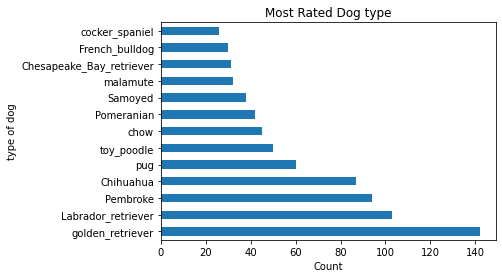

In [102]:
dog_type = df.groupby('dog_type').filter(lambda x: len(x) >= 25)
dog_type['dog_type'].value_counts().plot(kind = 'barh')
plt.title('Most Rated Dog type')
plt.xlabel('Count')
plt.ylabel('type of dog');

#### pupper is the most common dog stage in the dataset

In [103]:
df.dog_stage.value_counts()

pupper     206
doggo       59
puppo       22
floofer      8
Name: dog_stage, dtype: int64

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1925 non-null   int64  
 1   timestamp           1925 non-null   object 
 2   text                1925 non-null   object 
 3   rating_numerator    1925 non-null   float64
 4   rating_denominator  1925 non-null   float64
 5   name                1925 non-null   object 
 6   dog_stage           295 non-null    object 
 7   rating              1925 non-null   float64
 8   jpg_url             1925 non-null   object 
 9   dog_type            1624 non-null   object 
 10  confidence_list     1925 non-null   object 
 11  retweet_count       1925 non-null   int64  
 12  favorite_count      1925 non-null   int64  
 13  user_count          1925 non-null   int64  
 14  retweeted_status    1925 non-null   object 
 15  url                 1925 non-null   object 
dtypes: flo

In [105]:
df.rating.describe()

count    1925.000000
mean        1.072588
std         0.958355
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max        42.000000
Name: rating, dtype: float64

In [106]:
print(df.iloc[df[df.rating==42].index.values[0]]['text'])

After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY


In [107]:
print(df.iloc[df[df.rating==0].index.values[0]]['text'])

PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX


### retweets and favourite count have Positive relationship with rating

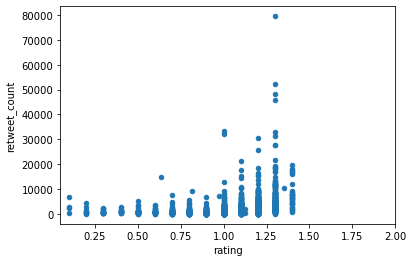

In [108]:
df.plot(x='rating', y='retweet_count', kind='scatter', xlim=(.05,2));

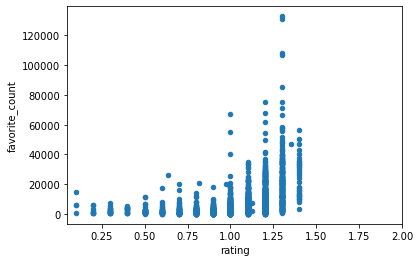

In [109]:
df.plot(x='rating', y='favorite_count', kind='scatter',xlim=(.05,2));

### the effect of  dog stage on rating and favourit count

In [110]:
dog_stage_rating_mean = df.groupby('dog_stage')['rating'].mean()

In [111]:
dog_stage_rating_mean

dog_stage
doggo      1.179661
floofer    1.187500
pupper     1.061296
puppo      1.204545
Name: rating, dtype: float64

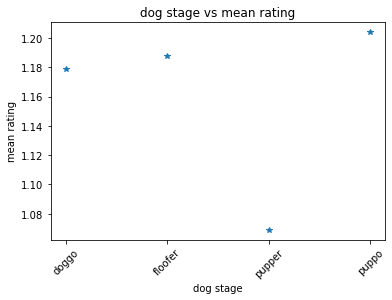

In [112]:
import pylab as pl
x = [0,1,2,3]
xTicks = ['doggo','floofer','pupper','puppo']
y = [1.179, 1.1875, 1.0689, 1.204]
pl.xticks(x, xTicks)
pl.xticks(range(4), xTicks, rotation=45) #writes strings with 45 degree angle
pl.plot(x,y,'*')
pl.title('dog stage vs mean rating')
pl.xlabel('dog stage')
pl.ylabel('mean rating')
pl.show()

In [113]:
dog_stage_favorite_count_mean = df.groupby('dog_stage')['favorite_count'].mean()
dog_stage_favorite_count_mean

dog_stage
doggo      17155.949153
floofer    13701.375000
pupper      6876.407767
puppo      22911.318182
Name: favorite_count, dtype: float64

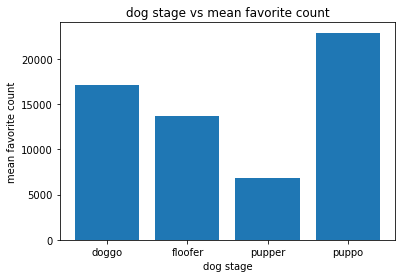

In [114]:
locations = [1, 2, 3, 4]  
heights = dog_stage_favorite_count_mean


labels = dog_stage_favorite_count_mean.index

plt.bar(locations, heights, tick_label=labels)
plt.title('dog stage vs mean favorite count')
plt.xlabel('dog stage')
plt.ylabel('mean favorite count');

### puppo stage  have the highest mean value in both retweet count and favourit count 

In [115]:
df.groupby('dog_type').rating.mean().sort_values(ascending=False)

dog_type
Bouvier_des_Flandres           1.300000
Saluki                         1.250000
briard                         1.233333
Irish_setter                   1.233333
Border_terrier                 1.214286
                                 ...   
Scotch_terrier                 0.900000
Walker_hound                   0.900000
soft-coated_wheaten_terrier    0.880000
Afghan_hound                   0.800000
Japanese_spaniel               0.500000
Name: rating, Length: 113, dtype: float64

### the following insights to know more insightful details about what is the most stage is taking higher rate, i thought the average is a bit misleading because the count of each stage is far from each other [206, 59, 22, 8]


In [116]:
df_E =df.iloc[:, np.r_[6, 7]]
df_E

,dog_stage,rating
0,NaN,0.7
1,NaN,1.2
2,NaN,1.0
3,NaN,0.6
4,NaN,1.1
...,...,...
1920,puppo,0.9
1921,puppo,1.3
1922,puppo,1.2
1923,puppo,1.2


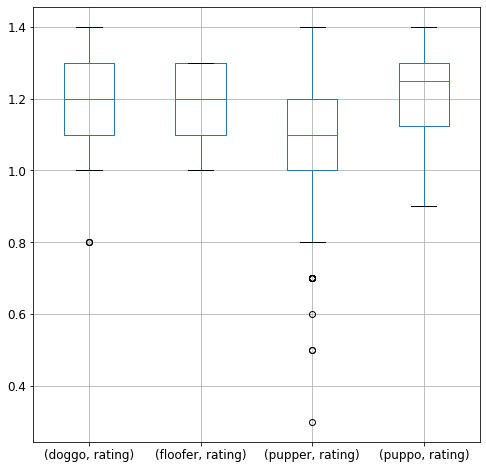

In [117]:
df_E.groupby('dog_stage').boxplot(subplots=False, figsize=(8,8),fontsize=12);

### as we can see the  dog stage doesn't  affect  as much as we thought on rating subsequently favourite count and retweets